# **Preprocessing dataset**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.under_sampling import NearMiss
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.metrics import classification_report, multilabel_confusion_matrix, ConfusionMatrixDisplay


data = pd.read_csv("/Users/Cristian/Documents/EPN/Maestría en Computación/OneDrive - Escuela Politécnica Nacional/2022-B/Tesis/Dataset/20221215_151443_clustering.csv")
#data = pd.read_csv("F:/EPN/Maestría en Computación/OneDrive - Escuela Politécnica Nacional/2022-B/Tesis/Dataset/20221215_151443_clustering.csv")

df = data.loc[:, ['steering_angle', 'speed', 'rpm', 'acceleration' 'throttle_position', 'engine_temperature', 'system_voltage', 'barometric_pressure',
    'distance_travelled', 'latitude', 'longitude', 'heart_rate', 'accidents_onsite', 'risk_level']]

le = LabelEncoder()
df['risk_level']= le.fit_transform(df['risk_level'])

n = len(pd.unique(df['risk_level']))

X = df.iloc[:,0:13]
Y = df.iloc[:,-1:]

undersample = NearMiss(version = 1, n_neighbors = 4)
X_res, Y_res = undersample.fit_resample(X, Y)

scaler = StandardScaler()
X = scaler.fit_transform(X_res)
Y = Y_res

In [2]:
Y = np.array(Y)

# **Hyperparameter Tunning**

In [3]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv1D, Flatten, Dense, Dropout, MaxPooling1D

In [4]:
def build_model(filters1 = 8, filters2 = 32, filters3 = 64, filters4 = 128, filters5 = 128, kernel_size = 3, pool_size = 1, dense_units = 64, dropout_rate = 0.25):
    model = Sequential()

    #### Input Layer ####
    model.add(Conv1D(filters1, kernel_size, activation = 'relu', input_shape = (X.shape[1], 1)))

    #### Convolutional Layers ####
    model.add(Conv1D(filters2, kernel_size, activation = 'relu'))
    model.add(MaxPooling1D(pool_size))

    model.add(Conv1D(filters3, kernel_size, activation = 'relu'))
    model.add(MaxPooling1D(pool_size))

    model.add(Conv1D(filters4, kernel_size, activation = 'relu'))
    model.add(MaxPooling1D(pool_size))

    model.add(Conv1D(filters5, kernel_size, activation = 'relu'))
    model.add(MaxPooling1D(pool_size))

    #### Fully-Connected Layer ####
    model.add(Flatten())
    model.add(Dense(dense_units, activation = 'relu'))
    model.add(Dropout(dropout_rate))

    #### Output Layer ####
    model.add(Dense(n, activation = 'softmax'))

    model.compile(optimizer = 'adam',
                loss = 'sparse_categorical_crossentropy',
                metrics = ['accuracy'])
    return model

In [5]:
model = KerasClassifier(build_fn = build_model, epochs = 5, batch_size = 32, verbose = 0)
param_grid = {
    'filters1': [8, 16, 32],
    'filters2': [32, 64, 128],
    'filters3': [64, 128, 256],
    'filters4': [128, 256, 512],
    'filters5': [128, 256, 512],
    'dense_units': [64, 128, 256, 512],
    'dropout_rate': [0.25, 0.5]
}
grid = GridSearchCV(estimator = model, param_grid = param_grid, cv = 2, verbose = 2)
grid.fit(X, Y.flatten())

# Print the best hyperparameters
print(
	"Best parameters are {} \nScore: {}%".format(
		grid.best_params_, grid.best_score_)
)

C:\Users\Cristian\AppData\Local\Temp\ipykernel_26188\2859931218.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn = build_model, epochs = 5, batch_size = 32, verbose = 0)


Fitting 2 folds for each of 1944 candidates, totalling 3888 fits
[CV] END dense_units=64, dropout_rate=0.25, filters1=8, filters2=32, filters3=64, filters4=128, filters5=128; total time=   1.6s
[CV] END dense_units=64, dropout_rate=0.25, filters1=8, filters2=32, filters3=64, filters4=128, filters5=128; total time=   1.4s
[CV] END dense_units=64, dropout_rate=0.25, filters1=8, filters2=32, filters3=64, filters4=128, filters5=256; total time=   1.5s
[CV] END dense_units=64, dropout_rate=0.25, filters1=8, filters2=32, filters3=64, filters4=128, filters5=256; total time=   1.5s
[CV] END dense_units=64, dropout_rate=0.25, filters1=8, filters2=32, filters3=64, filters4=128, filters5=512; total time=   1.7s
[CV] END dense_units=64, dropout_rate=0.25, filters1=8, filters2=32, filters3=64, filters4=128, filters5=512; total time=   1.5s
[CV] END dense_units=64, dropout_rate=0.25, filters1=8, filters2=32, filters3=64, filters4=256, filters5=128; total time=   1.5s
[CV] END dense_units=64, dropout

# **Cross Validation**

In [6]:
num_folds = 5
num_epochs = 100
batch_size = 32
X = np.array(X)
Y = np.array(Y)

# Define per-fold score containers
acc_per_fold = []
loss_per_fold = []
specifity_per_fold = []
sensivity_per_fold = []

# Define the K-fold Cross Validator
kfold = KFold(n_splits = num_folds, shuffle = True)

# **CNN Implementation**

In [7]:
cnn = Sequential()

#### Input Layer ####
cnn.add(Conv1D(32, kernel_size = 3, activation = 'relu', input_shape = (X.shape[1], 1)))

#### Convolutional Layers ####
cnn.add(Conv1D(128, kernel_size = 3, activation = 'relu'))
cnn.add(MaxPooling1D(1))

cnn.add(Conv1D(64, kernel_size = 3, activation = 'relu'))
cnn.add(MaxPooling1D(1))

cnn.add(Conv1D(128, kernel_size = 3, activation = 'relu'))
cnn.add(MaxPooling1D(1))

cnn.add(Conv1D(256, kernel_size = 3, activation = 'relu'))
cnn.add(MaxPooling1D(1))

#### Fully-Connected Layer ####
cnn.add(Flatten())
cnn.add(Dense(512, activation = 'relu'))
cnn.add(Dropout(0.5))

#### Output Layer ####
cnn.add(Dense(n, activation = 'softmax'))

opt = keras.optimizers.Adam(
    learning_rate = 0.001,
    beta_1 = 0.9,
    beta_2 = 0.999,
    epsilon = 1e-07,
    amsgrad = False,
    weight_decay = None,
    clipnorm = None,
    clipvalue = None,
    global_clipnorm = None,
    use_ema = False,
    ema_momentum = 0.99,
    ema_overwrite_frequency = None,
    name = "adam"
)
cnn.compile(optimizer = opt,
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])
cnn.summary()

Model: "sequential_3889"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_19445 (Conv1D)       (None, 10, 32)            128       
                                                                 
 conv1d_19446 (Conv1D)       (None, 8, 128)            12416     
                                                                 
 max_pooling1d_15556 (MaxPoo  (None, 8, 128)           0         
 ling1D)                                                         
                                                                 
 conv1d_19447 (Conv1D)       (None, 6, 64)             24640     
                                                                 
 max_pooling1d_15557 (MaxPoo  (None, 6, 64)            0         
 ling1D)                                                         
                                                                 
 conv1d_19448 (Conv1D)       (None, 4, 128)        

------------------------------------------------------------------------
Training for fold 1 ...

Epoch 1/100
48/48 [==============================] - 2s 30ms/step - loss: 1.1003 - accuracy: 0.4967
Epoch 2/100
48/48 [==============================] - 1s 28ms/step - loss: 0.8270 - accuracy: 0.6510
Epoch 3/100
48/48 [==============================] - 1s 28ms/step - loss: 0.6908 - accuracy: 0.7188
Epoch 4/100
48/48 [==============================] - 1s 29ms/step - loss: 0.6055 - accuracy: 0.7611
Epoch 5/100
48/48 [==============================] - 1s 28ms/step - loss: 0.5200 - accuracy: 0.7878
Epoch 6/100
48/48 [==============================] - 1s 28ms/step - loss: 0.4497 - accuracy: 0.8164
Epoch 7/100
48/48 [==============================] - 1s 28ms/step - loss: 0.4745 - accuracy: 0.8014
Epoch 8/100
48/48 [==============================] - 1s 29ms/step - loss: 0.3965 - accuracy: 0.8496
Epoch 9/100
48/48 [==============================] - 1s 28ms/step - loss: 0.4102 - accuracy: 0.8314
Ep

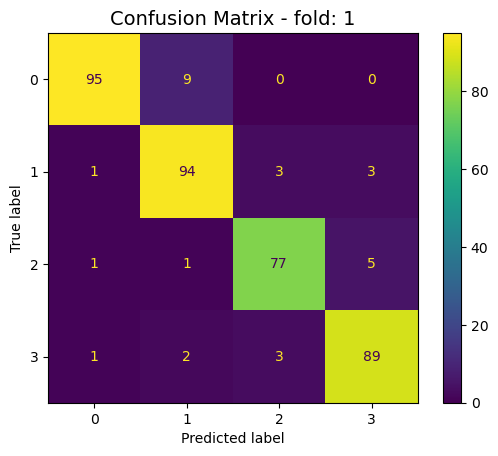

------------------------------------------------------------------------
Training for fold 2 ...

Epoch 1/100
48/48 [==============================] - 1s 28ms/step - loss: 0.1380 - accuracy: 0.9492
Epoch 2/100
48/48 [==============================] - 1s 29ms/step - loss: 0.0847 - accuracy: 0.9674
Epoch 3/100
48/48 [==============================] - 1s 28ms/step - loss: 0.0901 - accuracy: 0.9648
Epoch 4/100
48/48 [==============================] - 1s 28ms/step - loss: 0.0998 - accuracy: 0.9661
Epoch 5/100
48/48 [==============================] - 1s 29ms/step - loss: 0.0651 - accuracy: 0.9740
Epoch 6/100
48/48 [==============================] - 1s 30ms/step - loss: 0.0477 - accuracy: 0.9818
Epoch 7/100
48/48 [==============================] - 1s 30ms/step - loss: 0.0490 - accuracy: 0.9811
Epoch 8/100
48/48 [==============================] - 1s 29ms/step - loss: 0.0533 - accuracy: 0.9779
Epoch 9/100
48/48 [==============================] - 1s 30ms/step - loss: 0.0772 - accuracy: 0.9733
Ep

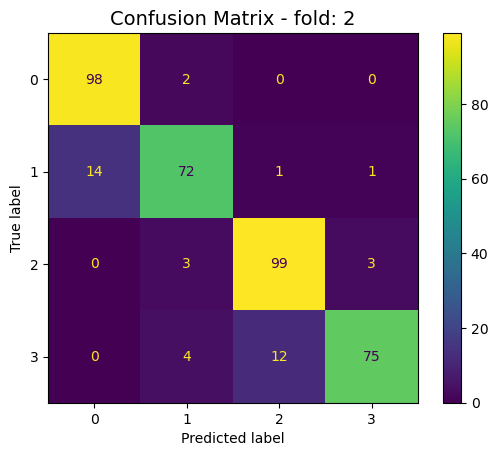

------------------------------------------------------------------------
Training for fold 3 ...

Epoch 1/100
48/48 [==============================] - 1s 28ms/step - loss: 0.1809 - accuracy: 0.9427
Epoch 2/100
48/48 [==============================] - 1s 29ms/step - loss: 0.0912 - accuracy: 0.9661
Epoch 3/100
48/48 [==============================] - 1s 28ms/step - loss: 0.0563 - accuracy: 0.9792
Epoch 4/100
48/48 [==============================] - 1s 29ms/step - loss: 0.0648 - accuracy: 0.9759
Epoch 5/100
48/48 [==============================] - 1s 28ms/step - loss: 0.0572 - accuracy: 0.9746
Epoch 6/100
48/48 [==============================] - 1s 28ms/step - loss: 0.0682 - accuracy: 0.9798
Epoch 7/100
48/48 [==============================] - 1s 28ms/step - loss: 0.0488 - accuracy: 0.9792
Epoch 8/100
48/48 [==============================] - 1s 28ms/step - loss: 0.0454 - accuracy: 0.9824
Epoch 9/100
48/48 [==============================] - 1s 28ms/step - loss: 0.0449 - accuracy: 0.9759
Ep

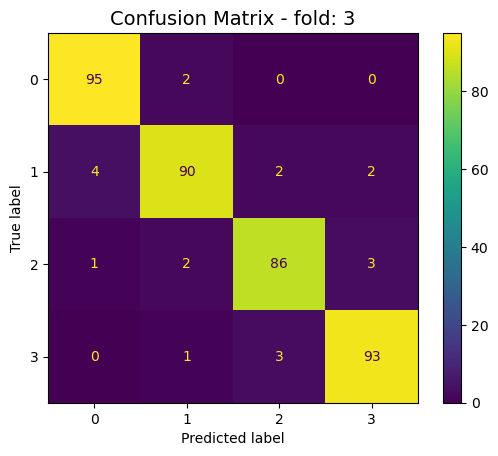

------------------------------------------------------------------------
Training for fold 4 ...

Epoch 1/100
48/48 [==============================] - 1s 29ms/step - loss: 0.1099 - accuracy: 0.9616
Epoch 2/100
48/48 [==============================] - 1s 29ms/step - loss: 0.0768 - accuracy: 0.9733
Epoch 3/100
48/48 [==============================] - 1s 28ms/step - loss: 0.0807 - accuracy: 0.9811
Epoch 4/100
48/48 [==============================] - 1s 29ms/step - loss: 0.0483 - accuracy: 0.9824
Epoch 5/100
48/48 [==============================] - 1s 30ms/step - loss: 0.0467 - accuracy: 0.9837
Epoch 6/100
48/48 [==============================] - 1s 28ms/step - loss: 0.0443 - accuracy: 0.9824
Epoch 7/100
48/48 [==============================] - 1s 28ms/step - loss: 0.0503 - accuracy: 0.9850
Epoch 8/100
48/48 [==============================] - 1s 29ms/step - loss: 0.0337 - accuracy: 0.9850
Epoch 9/100
48/48 [==============================] - 1s 29ms/step - loss: 0.0378 - accuracy: 0.9896
Ep

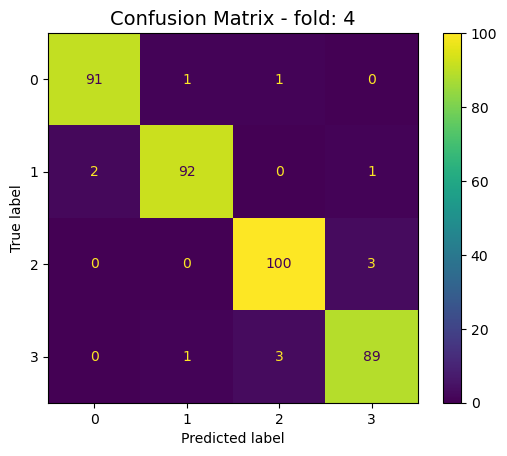

------------------------------------------------------------------------
Training for fold 5 ...

Epoch 1/100
48/48 [==============================] - 1s 30ms/step - loss: 0.0681 - accuracy: 0.9824
Epoch 2/100
48/48 [==============================] - 1s 29ms/step - loss: 0.0596 - accuracy: 0.9818
Epoch 3/100
48/48 [==============================] - 1s 28ms/step - loss: 0.0503 - accuracy: 0.9818
Epoch 4/100
48/48 [==============================] - 1s 31ms/step - loss: 0.0473 - accuracy: 0.9870
Epoch 5/100
48/48 [==============================] - 2s 32ms/step - loss: 0.0525 - accuracy: 0.9831
Epoch 6/100
48/48 [==============================] - 1s 30ms/step - loss: 0.0685 - accuracy: 0.9811
Epoch 7/100
48/48 [==============================] - 1s 30ms/step - loss: 0.0399 - accuracy: 0.9876
Epoch 8/100
48/48 [==============================] - 1s 30ms/step - loss: 0.0149 - accuracy: 0.9948
Epoch 9/100
48/48 [==============================] - 1s 30ms/step - loss: 0.0167 - accuracy: 0.9948
Ep

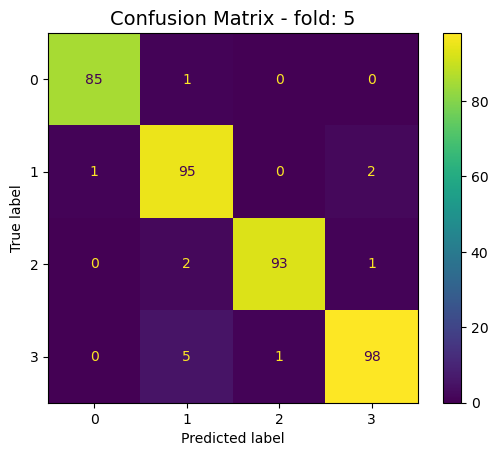

In [8]:
# K-fold Cross Validation model evaluation
fold_no = 1
for train, test in kfold.split(X, Y):
    
    # Generate a print
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...\n')

    # Fit data to model
    cnn.fit(X[train], Y[train],
                    epochs = num_epochs,
                    batch_size = batch_size,
                    verbose = 1)
    
    # Predict the labels of test set
    predicted_classes = cnn.predict(X[test])
    y_pred = np.argmax(np.round(predicted_classes), axis = 1)

    target_names = ["Class {}".format(i) for i in range(n)]
    print(classification_report(Y[test], y_pred, target_names = target_names, zero_division = 0))

    # Confusion Matrix
    mcm = multilabel_confusion_matrix(Y[test], y_pred)

    tn = mcm[:, 0, 0]
    tp = mcm[:, 1, 1]
    fn = mcm[:, 1, 0]
    fp = mcm[:, 0, 1]

    specifity = np.mean(tn / (tn + fp))
    sensivity = np.mean(tp / (tp + fn))

    # Generate generalization metrics of evaluation
    scores = cnn.evaluate(X[test], Y[test], verbose = 0)
    print(f'\nScore for fold {fold_no}: {cnn.metrics_names[0]}: {scores[0]} - {cnn.metrics_names[1]}: {scores[1]} - Specifity: {specifity} - Sensivity: {sensivity}')

    # Plot Confusion Matrix of each fold
    ConfusionMatrixDisplay.from_predictions(Y[test], y_pred)
    plt.title(f'Confusion Matrix - fold: {fold_no}', fontsize = 14)
    plt.show()
    
    acc_per_fold.append(scores[1])
    loss_per_fold.append(scores[0])
    specifity_per_fold.append(specifity)
    sensivity_per_fold.append(sensivity)

    # Increase fold number
    fold_no = fold_no + 1

# **Resume Evaluation Metric scores**

In [9]:
# == Provide average scores ==
print('Resume scores per fold')
for i in range(0, num_folds):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]} - Specificity: {specifity_per_fold[i]} - Sensitivity: {sensivity_per_fold[i]}')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)}')
print(f'> Loss: {np.mean(loss_per_fold)}')
print(f'> Specificity: {np.mean(specifity_per_fold)}')
print(f'> Sensitivity: {np.mean(sensivity_per_fold)}')

Resume scores per fold
------------------------------------------------------------------------
> Fold 1 - Loss: 0.2507205009460449 - Accuracy: 0.9270833134651184 - Specificity: 0.9748003066327342 - Sensitivity: 0.9244158449245734
------------------------------------------------------------------------
> Fold 2 - Loss: 0.40820297598838806 - Accuracy: 0.8958333134651184 - Specificity: 0.965012990183687 - Sensitivity: 0.8913036963036962
------------------------------------------------------------------------
> Fold 3 - Loss: 0.15825289487838745 - Accuracy: 0.9479166865348816 - Specificity: 0.9826377473178342 - Sensitivity: 0.9478235713828338
------------------------------------------------------------------------
> Fold 4 - Loss: 0.15775036811828613 - Accuracy: 0.96875 - Specificity: 0.9895565381573039 - Sensitivity: 0.968694677501772
------------------------------------------------------------------------
> Fold 5 - Loss: 0.18490004539489746 - Accuracy: 0.9661458134651184 - Specificity:

# **Saving Model**

In [18]:

cnn.save("/Users/Cristian/Documents/EPN/Maestría en Computación/OneDrive - Escuela Politécnica Nacional/2022-B/Tesis/Script/Models/CNN-model1-ep"+ str(num_epochs) + ".keras", overwrite = True)